# Crowdstrike Data Science Internship: Machine Learning Challenge 

## Phishing URLs Detection

This is the empty notebook to be used in the Machine Learning Challenge that has to be completed in order to be invited for the on-site interview.

As a brief reminder, you are provided with three files, the data that your model needs to use in order to fulfill the current requirement:

    - train.csv contains all the data (features and EventID as label) to be used for train.
    - validation.csv has data to be used for validation/tuning purposes.
    - test.csv is the data that will remain untouched in the learning process and will only be used to assess the performance of the model.

    Read the data, then build your model(s) to solve the proposed challenge.

**IMPORTANT Notes** 

1. Do not forget to make save your notebook from time to time (checkpoints). Let the cells run in order for us to be able to see your outputs.

2. You are allowed, post fine-tuning to use the validation data for training. It's you call if you are using it to train or not.

3. test.csv does not contain any labels, only the URLs that are to be used as inputs to your model. We will evaluate your method, F1 score-wise, using the test data.

4. Even if you don't achieve top scores in the evaluation phase, although that is an important step as well, we will look over your code, analysis (use the Validation set, or part of it, for that), plots and metrics used in drawing conclusions. Please be careful to this part as well, as it will add up to your final score.

Good luck!


In [1]:
# If you'd like to install packages that aren't installed by default, list them here.
# This will ensure your notebook has all the dependencies and works everywhere
import sys
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install plotly

In [2]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly
from urllib.parse import urlparse

In [3]:
# Read the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test_samples_only.csv')
valid = pd.read_csv('validation.csv')
train.columns



Index(['url', 'label'], dtype='object')

In [4]:
# Removing duplicate items
train.duplicated().sum()
train = train.drop_duplicates()
train.shape

(36721, 2)

# Feature Engineering

In [5]:
# Exract features from urls (Lexical)
def get_dot_count(url):
    return url.count('.')

def get_url_length(url):
    return len(url)

def get_special_char_count(url):
    count = 0
    special_characters = [';','+=','_','?','=','&','[',']']
    for each_letter in url:
        if each_letter in special_characters:
            count = count + 1
    return count

def get_hyphen_count(url):
    return url.count('-')

def get_double_slash(url):
    return url.count('//')

def get_single_slash(url):
    return url.count('/')

def get_protocol(url):
    protocol = urlparse(url)
    if(protocol.scheme == 'http'):
        return 1
    else:
        return 0
    
def get_protocol_count(url):
    http_count = url.count('http')
    https_count = url.count('https')
    http_count = http_count - https_count #correcting the miscount of https as http
    return (http_count + https_count)

# Create lists for each feature for creating np arrays



In [6]:
# Extract features

def extract_all_features(dataset, df):
    dotCount = []
    urlLength = []
    specialCharCount = []
    hyphenCount = []
    doubleSlashCount = []
    singleSlashCount = []
    protocol = []
    protocolCount = []
    counter = 0
    for url in dataset['url']:
        counter = counter + 1
        #Extracting lexical features from URLs
        dotCount.append(get_dot_count(url))
        urlLength.append(get_url_length(url))
        specialCharCount.append(get_special_char_count(url))
        hyphenCount.append(get_hyphen_count(url))
        doubleSlashCount.append(get_double_slash(url))
        singleSlashCount.append(get_single_slash(url))
        protocol.append(get_protocol(url))
        protocolCount.append(get_protocol_count(url))
    df["dot_count"] = dotCount
    df["url_len"] = urlLength
    df["special_count"] = specialCharCount
    df["hyphen_count"] = hyphenCount
    df["double_slash"] = doubleSlashCount
    df["single_slash"] = singleSlashCount
    df["protocol"] = protocol
    df["protocol_count"] = protocolCount

In [7]:
features_df = pd.DataFrame()
extract_all_features(train, features_df)
labels = np.array(train['label'])


# Training Model and Testing its Accuracy

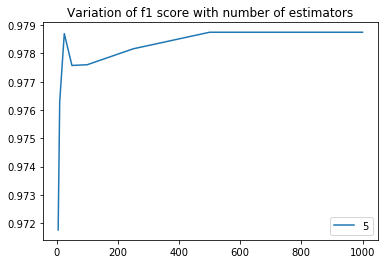

Best F1 Score = 0.9787478460654797


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
estim = [5, 10, 25, 50, 100, 250, 500, 750, 1000]
score_list = []
for est in estim:
    forest_model = RandomForestClassifier(random_state=3, 
                                            n_estimators=est)
    forest_model.fit(features_df, labels)
    valid_df = pd.DataFrame()
    valid_labels = np.array(valid['label'])
    extract_all_features(valid, valid_df)
    valid_preds = forest_model.predict(valid_df)
    score = f1_score(valid_labels, valid_preds)
    score_list.append(score)

plt.plot(estim, score_list)
plt.legend(estim)
plt.title('Variation of f1 score with number of estimators')
plt.show()

print(f"Best F1 Score = {max(score_list)}")

**Lets zoom in between 500 & 1000 as that is where the best accuracy is attained**

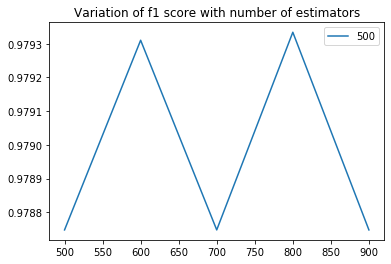

Best F1 Score = 0.9793340987370838


In [9]:
estim = list(range(500, 1000, 100))
score_list = []
for est in estim:
    forest_model = RandomForestClassifier(random_state=3, 
                                            n_estimators=est)
    forest_model.fit(features_df, labels)
    valid_df = pd.DataFrame()
    valid_labels = np.array(valid['label'])
    extract_all_features(valid, valid_df)
    valid_preds = forest_model.predict(valid_df)
    score = f1_score(valid_labels, valid_preds)
    score_list.append(score)

plt.plot(estim, score_list)
plt.legend(estim)
plt.title('Variation of f1 score with number of estimators')
plt.show()

print(f"Best F1 Score = {max(score_list)}")

**It seems that n_estimators=800 is the most accurate so that is what I shall use for the submission testing set**

# Running Model on Test Sample Set

In [12]:
# Using model on test set and outputting file as submission.csv
forest_model = RandomForestClassifier(random_state=3, 
                                        n_estimators=800)
forest_model.fit(features_df, labels)  
test_df = pd.DataFrame()
extract_all_features(test, test_df)
test_preds = forest_model.predict(test_df)

results = pd.DataFrame()
results["label"]=test_preds
results.to_csv('submission.csv', index=False)


# Cross Validation Method
---
**Another approach to assess the accuracy of the model would be to use cross validation on the training and validation data sets to ensure that the model does not overfit the data**

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
cross_df = pd.concat([features_df, valid_df], ignore_index=True)
cross_labels = np.hstack([labels, valid_labels])
my_pipeline = Pipeline(steps=[('model', RandomForestClassifier(n_estimators=800, 
                                                                   random_state=0))
                                 ])
scores = cross_val_score(my_pipeline, cross_df, cross_labels, 
                              cv=5, 
                              scoring='f1')
print(f"F1 Score = {scores.mean()}")

F1 Score = 0.9740427891556754


# What More I Would Have Done
---
 - Used different models and compared the accuracy of them
 - Tune the hyperparameters of the models as opposed to just random state and n_estimators
 - Look for data leakage in the features and adjust accordingly
 - Test Principal Component Analysis on the features to see whether that would have improved accuracy